In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

con = sqlite3.connect("csgo.db")

csgo_df = pd.read_sql_query("SELECT * from round, game WHERE round.game_id = game.id", con, parse_dates=["time"])
players_df = pd.read_sql_query("SELECT * from players", con)
csgo_df['time'] = pd.to_datetime(csgo_df['time'], utc=True)

In [13]:
csgo_df['survivingCount'] =  csgo_df.survivingPlayers.apply(lambda x: len(x[1:-1].split(',')) if x != 'null' else 0)

In [14]:
yearly_average = csgo_df.resample("Y", on="time")
yearly_average.mean().dropna()

/tmp/ipykernel_31305/109468099.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_average.mean().dropna()


,round_id,game_id,duration,losingSide,startTick,endTick,endOfficialTick,losingTeamLeftoverMoney,equipmentSavedValue,longestKillWait,lastKillToEnd,round_no,heDamage,id,tickrate,survivingCount
time,,,,,,,,,,,,,,,,
2014-12-31 00:00:00+00:00,1191.5,47.668766,76.928631,2.405122,183612.505038,193045.977330,195460.715365,20242.359362,712.132662,2649.380772,462.788833,12.620067,0.000000,47.668766,128.0,0.172544
2016-12-31 00:00:00+00:00,6390.0,241.107598,83.960831,2.482775,221908.191600,232133.887211,235031.957527,19772.463426,975.460123,2860.500236,676.764512,13.473808,23.643700,241.107598,128.0,0.259084
2019-12-31 00:00:00+00:00,8334.5,313.853107,77.003390,2.066667,233057.880226,208867.985311,246652.297740,19986.638418,2549.039548,3337.181356,977.367232,13.256497,25.550282,313.853107,128.0,0.593220
2021-12-31 00:00:00+00:00,10131.0,379.487658,90.317060,2.419089,217485.490400,228516.596270,230317.986835,20816.758091,1997.202414,3408.556775,1081.537575,13.244103,33.112452,379.487658,128.0,0.443774
2022-12-31 00:00:00+00:00,3856.5,146.589552,89.905360,2.445726,232251.232022,243162.265604,244786.142469,20888.839891,2012.042062,3245.373474,1134.177069,13.677748,32.427748,146.589552,128.0,0.446065


In [15]:
monthly_average = csgo_df.resample("M", on="time")
monthly_average.mean().dropna()

/tmp/ipykernel_31305/2198300793.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_average.mean().dropna()


,round_id,game_id,duration,losingSide,startTick,endTick,endOfficialTick,losingTeamLeftoverMoney,equipmentSavedValue,longestKillWait,lastKillToEnd,round_no,heDamage,id,tickrate,survivingCount
time,,,,,,,,,,,,,,,,
2014-03-31 00:00:00+00:00,1363.000000,54.246871,76.517634,2.455063,183883.199090,193149.213879,195122.092150,20454.550626,790.614334,2642.104664,517.871445,12.588168,0.000000,54.246871,128.0,0.188851
2014-08-31 00:00:00+00:00,2092.500000,82.734483,81.324138,2.412069,198108.851724,208184.668966,210342.818966,20252.586207,773.189655,2756.577586,453.074138,12.874138,0.000000,82.734483,128.0,0.181034
2014-11-30 00:00:00+00:00,462.000000,19.369447,74.557963,2.353196,174245.418202,183434.724810,186431.495125,20033.856988,599.024919,2588.949079,416.436620,12.490791,0.000000,19.369447,128.0,0.151679
2016-04-30 00:00:00+00:00,6950.500000,261.871743,84.291583,2.510020,228674.474950,239135.340681,241480.592184,19978.406814,920.390782,2858.825651,652.044088,13.984970,25.575150,261.871743,128.0,0.232465
2016-07-31 00:00:00+00:00,5891.000000,222.621766,83.666369,2.458519,215884.328278,225900.657449,229290.889384,19589.116860,1024.487065,2861.991079,698.772525,13.018733,21.924175,222.621766,128.0,0.282783
2019-02-28 00:00:00+00:00,8345.192204,314.230511,77.831317,2.077285,237588.754032,213779.424059,251552.486559,20114.012097,2546.270161,3407.835349,966.387097,13.435484,24.996640,314.230511,128.0,0.596102
2019-03-31 00:00:00+00:00,8278.081560,311.861702,72.634752,2.010638,209150.290780,182952.308511,220795.982270,19314.539007,2563.652482,2964.368794,1035.304965,12.312057,28.471631,311.861702,128.0,0.578014
2021-10-31 00:00:00+00:00,10288.368276,385.408276,88.183448,2.398621,197448.711724,207952.173793,210868.624828,20370.482759,2010.137931,3241.038621,1052.725517,12.100690,34.110345,385.408276,128.0,0.464828
2021-11-30 00:00:00+00:00,10027.091075,375.578324,91.725865,2.432605,230715.603825,242095.108379,243160.234062,21111.429872,1988.661202,3519.167577,1100.561931,13.999089,32.453552,375.578324,128.0,0.429872


/tmp/ipykernel_31305/4135743296.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot = monthly_average[["time", "duration"]].mean().dropna()


<Axes: xlabel='time'>

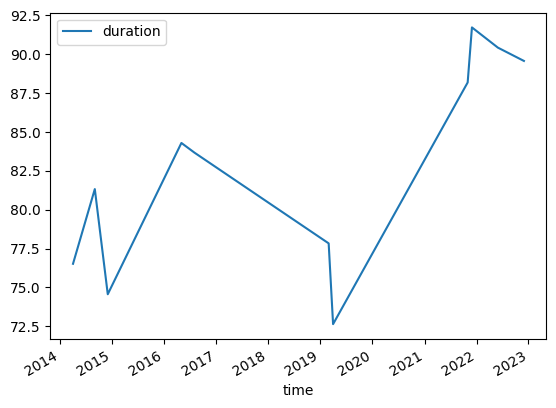

In [20]:
duration_plot = monthly_average[["time", "duration"]].mean().dropna()
duration_plot.plot()


/tmp/ipykernel_31305/683167702.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  survivingp_plot = monthly_average[["time", "survivingCount"]].mean().dropna()


<Axes: xlabel='time'>

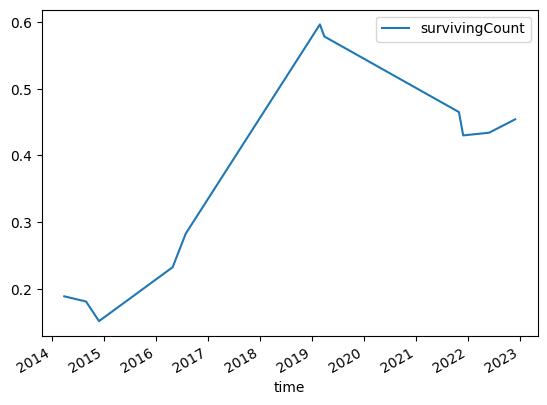

In [21]:
survivingp_plot = monthly_average[["time", "survivingCount"]].mean().dropna()
survivingp_plot.plot()

/tmp/ipykernel_31305/1778386084.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  longestkill_plot = monthly_average[["time", "longestKillWait"]].mean().dropna()


<Axes: xlabel='time'>

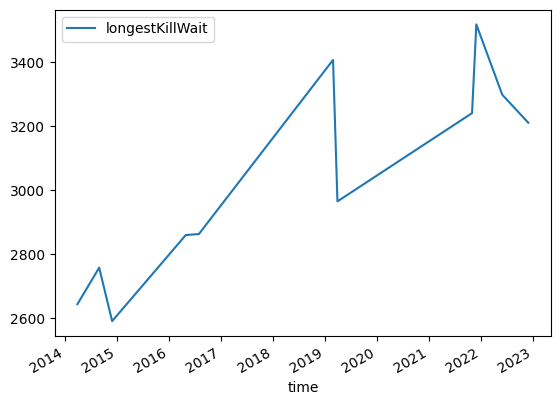

In [22]:
longestkill_plot = monthly_average[["time", "longestKillWait"]].mean().dropna()
longestkill_plot.plot()